In [1]:
import pandas as pd
import numpy as np

In [7]:
pd.to_datetime('Jan 15, 1997').day_name()

'Wednesday'

In [8]:
pd.to_datetime('Feb 29, 1925')

ValueError: day is out of range for month

In [10]:
pd.to_datetime(1000000, unit='h')

Timestamp('2084-01-29 16:00:00')

In [11]:
pd.to_datetime('July 20, 1969 2:56:15')

Timestamp('1969-07-20 02:56:15')

In [13]:
pd.to_datetime('today') - pd.to_datetime('July 20, 1969, 2:56:15')

Timedelta('18865 days 14:04:43.921299')

In [14]:
35 * 24

840

In [17]:
emp = pd.read_csv('./data/employee.csv', parse_dates=['hire_date'])
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [19]:
emp.insert(1, 'experience', (pd.to_datetime('today') - emp['hire_date']))

In [23]:
emp['experience'] = emp['experience'].dt.days/365

In [24]:
emp.head()

,dept,experience,title,hire_date,salary,sex,race
0,Police,19.290411,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,10.334247,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,15.186301,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,23.813699,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,15.147945,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [33]:
weather = pd.read_csv('./data/weather.csv', index_col='date', parse_dates=['date'])
weather.head()

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-01-02,No,No,55.9
2007-01-03,No,No,62.1
2007-01-04,No,No,69.1
2007-01-05,Yes,No,72.0


In [35]:
weather.loc['June 11, 2017']

rain           No
snow           No
temperature    90
Name: 2017-06-11 00:00:00, dtype: object

In [39]:
weather.loc['10-1-2011':'12-31-2011']['rain'].value_counts()

No     69
Yes    23
Name: rain, dtype: int64

In [40]:
weather.loc['2007']['snow'].value_counts()

No     360
Yes      5
Name: snow, dtype: int64

In [41]:
weather.loc['2012']['snow'].value_counts()

No     364
Yes      2
Name: snow, dtype: int64

In [43]:
weather.asfreq('2W-THU')

,rain,snow,temperature
date,,,
2007-01-04,No,No,69.1
2007-01-18,Yes,Yes,35.1
2007-02-01,Yes,Yes,34.0
2007-02-15,No,No,39.9
2007-03-01,Yes,No,66.9
...,...,...,...
2018-09-27,No,No,79.0
2018-10-11,No,No,79.0
2018-10-25,No,No,55.0


In [44]:
weather.asfreq('MS')

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-02-01,Yes,Yes,34.0
2007-03-01,Yes,No,66.9
2007-04-01,Yes,No,77.0
2007-05-01,No,No,91.9
...,...,...,...
2018-07-01,No,No,95.0
2018-08-01,No,No,90.0
2018-09-01,No,No,93.0


In [45]:
msft = pd.read_csv('./data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.250,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.250,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.500,93.063,30.0381,60801200,0.0
1999-10-22,93.563,93.875,91.750,92.688,29.9171,43650600,0.0
1999-10-25,92.000,93.563,91.125,92.438,29.8364,30492200,0.0


In [54]:
msft.resample('W').agg({'volume': ['sum']}).sort_values(by=('volume', 'sum'), ascending=False)

,volume
,sum
date,
2006-05-07,879723200
2002-07-28,837388600
2008-10-12,824330600
2006-04-30,818292700
2000-04-30,736006800
...,...
2019-07-07,69621700
2017-11-26,65531200


In [55]:
msft['up'] = msft['close'].diff() > 0

In [58]:
msft.resample('Q').agg({'up': 'sum'}).reset_index().sort_values('up', ascending=False)

,date,up
8,2001-12-31,43.0
40,2009-12-31,40.0
78,2019-06-30,40.0
67,2016-09-30,40.0
72,2017-12-31,40.0
...,...,...
17,2004-03-31,24.0
7,2001-09-30,23.0
3,2000-09-30,23.0
33,2008-03-31,21.0


In [60]:
msft.resample('Y').agg({'volume': ['min', 'max'], 'close': 'mean'})

volume                  close
                 min        max        mean
date                                       
1999-12-31  12517600  243819200   96.872519
2000-12-31  15734800  313645800   76.220722
2001-12-31  11701600  209348800   62.542290
2002-12-31  18386000  202307800   54.546635
2003-12-31  12076900  210558300   29.238298
2004-12-31  24398700  258269000   27.124718
2005-12-31  27212500  187384300   25.871306
2006-12-31  20456700  591052200   26.290355
2007-12-31  29622600  288121200   30.446745
2008-12-31  16880400  291138900   26.647510
2009-12-31  11083900  281761000   22.976794
2010-12-31  19502500  193888500   27.058675
2011-12-31  21287200  319317900   26.052155
2012-12-31  20842400  165902900   29.820280
2013-12-31  14243000  248428500   32.491508
2014-12-31  11437800  202522400   42.453341
2015-12-31   9009100  169164000   46.713810
2016-12-31   8409600  133503000   55.259306
2017-12-31   7425600   71066700   71.984024
2018-12-31  13677200  111242100  101.033984
2019-12-31  13304300   55636400  125.750099

In [62]:
emp = pd.read_csv('./data/employee.csv', parse_dates=['hire_date'])
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [65]:
emp.resample(on='hire_date', rule='5Y').agg({'salary': 'mean'})

,salary
hire_date,
1968-12-31,NaN
1973-12-31,64574.640000
1978-12-31,78074.008667
1983-12-31,73504.712738
1988-12-31,70655.520653
1993-12-31,69255.759681
1998-12-31,67875.931733
2003-12-31,63357.963896
2008-12-31,60447.709702


In [66]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [67]:
emp = emp.set_index('hire_date')

In [96]:
emp = emp.sort_index()
emp.head()

,dept,title,salary,sex,race
hire_date,,,,,
1968-12-13,Police,SENIOR POLICE OFFICER,NaN,Male,Black
1969-03-21,Police,POLICE SERGEANT,NaN,Male,Hispanic
1969-10-06,Other,SENIOR PUBLIC LOSS INVESTIGATOR,75067.00,Female,White
1970-02-02,Police,SENIOR POLICE OFFICER,NaN,Male,White
1970-04-06,Fire,INSPECTOR FIRE,70181.28,Male,Hispanic


In [97]:
s = emp['salary']
s

hire_date
1968-12-13          NaN
1969-03-21          NaN
1969-10-06     75067.00
1970-02-02          NaN
1970-04-06     70181.28
                ...    
2018-12-31     33238.00
2018-12-31    105000.00
2018-12-31     52291.00
2018-12-31     33238.00
2018-12-31     35506.00
Name: salary, Length: 24308, dtype: float64

In [106]:
rolling = s.loc['1-1-1990':].rolling('1000D').agg('mean')
rolling

hire_date
1990-01-02    66560.000000
1990-01-03    68469.500000
1990-01-05    57377.666667
1990-01-08    62018.775000
1990-01-12    67124.096000
                  ...     
2018-12-31    45654.254281
2018-12-31    45666.992153
2018-12-31    45668.413614
2018-12-31    45665.746715
2018-12-31    45663.567447
Name: salary, Length: 22244, dtype: float64

In [107]:
rolling = rolling.dropna()

In [108]:
import matplotlib.pyplot as plt

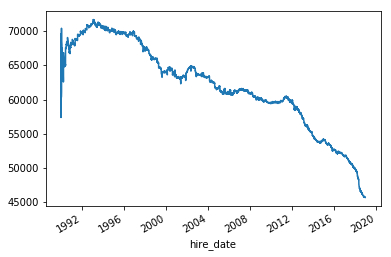

In [109]:
rolling.plot()

In [93]:
rolling.shape

(10199,)

In [111]:
energy = pd.read_csv('./data/energy_consumption.csv', parse_dates=['date'], index_col='date')
energy.head()

,source,energy (btu)
date,,
1973-01-01,residential,1932.187
1973-02-01,residential,1687.255
1973-03-01,residential,1497.067
1973-04-01,residential,1177.661
1973-05-01,residential,1015.008


In [112]:
energy = energy.sort_index()

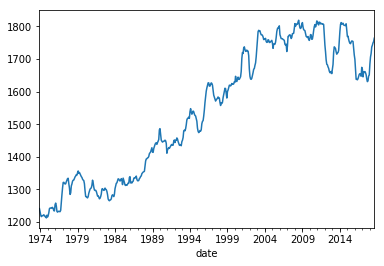

In [118]:
filt = energy['source'] == 'residential'
energy.loc[filt, 'energy (btu)'].rolling(12).agg('mean').dropna().plot()

In [120]:
tg = pd.Grouper(freq="10Y")
energy.groupby(['source', tg]).agg({'energy (btu)': 'mean'})

energy (btu)
source         date                    
commercial     1973-12-31    795.392667
               1983-12-31    861.047933
               1993-12-31   1052.647425
               2003-12-31   1341.764975
               2013-12-31   1492.886183
               2023-12-31   1515.195821
industrial     1973-12-31   2718.553000
               1983-12-31   2577.238783
               1993-12-31   2553.525542
               2003-12-31   2831.440517
               2013-12-31   2623.706108
               2023-12-31   2650.625607
residential    1973-12-31   1241.322000
               1983-12-31   1286.896167
               1993-12-31   1408.975850
               2003-12-31   1632.928025
               2013-12-31   1763.775225
               2023-12-31   1722.517286
transportation 1973-12-31   1551.064583
               1983-12-31   1615.420967
               1993-12-31   1803.501967
               2003-12-31   2115.492858
               2013-12-31   2285.795492
               2023-12-31   2311.641750

In [123]:
energy.pivot_table(index=tg, columns='source', values='energy (btu)')

source,commercial,industrial,residential,transportation
date,,,,
1973-12-31,795.392667,2718.553000,1241.322000,1551.064583
1983-12-31,861.047933,2577.238783,1286.896167,1615.420967
1993-12-31,1052.647425,2553.525542,1408.975850,1803.501967
2003-12-31,1341.764975,2831.440517,1632.928025,2115.492858
2013-12-31,1492.886183,2623.706108,1763.775225,2285.795492
2023-12-31,1515.195821,2650.625607,1722.517286,2311.641750


In [124]:
movies = pd.read_csv('./data/movie.csv')
movies.head()

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
2,Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
3,The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1


In [127]:
movies.loc[movies['title'].str.contains('zz')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
416,All That Jazz,1979.0,Color,R,123.0,Bob Fosse,189.0,Roy Scheider,813.0,Ben Vereen,...,87.0,NaN,Comedy|Drama|Music|Musical,84.0,19228,dancer|editing|stand up comedian|surgery|vomiting,English,USA,NaN,7.8
907,The Dukes of Hazzard,2005.0,Color,PG-13,107.0,Jay Chandrasekhar,422.0,Alice Greczyn,631.0,Jessica Simpson,...,379.0,80270227.0,Action|Adventure|Comedy,144.0,66382,1969 dodge charger|bikini|farm|misogynist|tow ...,English,USA,50000000.0,5.1
1041,Bedazzled,2000.0,Color,PG-13,93.0,Harold Ramis,11000.0,Brendan Fraser,3000.0,Frances O'Connor,...,484.0,37879996.0,Comedy|Fantasy|Romance,125.0,81888,contract|devil|dream|soul|wish,English,USA,48000000.0,6.0
2234,Paparazzi,2004.0,Color,PG-13,84.0,Paul Abascal,2.0,Cole Hauser,787.0,Tom Hollander,...,472.0,15712072.0,Action|Crime|Drama|Thriller,77.0,13210,actor|coma|movie star|paparazzi|revenge,English,USA,20000000.0,5.8
2524,Hot Fuzz,2007.0,Color,R,121.0,Edgar Wright,1000.0,Bill Bailey,175.0,Joe Cornish,...,108.0,23618786.0,Action|Comedy|Mystery,285.0,352695,accident|conspiracy|police|police officer|village,English,UK,8000000.0,7.9
2593,The Lizzie McGuire Movie,2003.0,Color,PG,94.0,Jim Fall,13.0,Clayton Snyder,925.0,Adam Lamberg,...,566.0,42672630.0,Adventure|Comedy|Family|Music|Romance,66.0,27580,best friend|roma|singer|spaghetti|teenager,English,USA,17000000.0,5.3
3215,Into the Grizzly Maze,2015.0,NaN,R,94.0,David Hackl,43.0,Scott Glenn,826.0,Michaela McManus,...,129.0,NaN,Action|Horror|Thriller,48.0,4486,bear|breasts|female nudity|grizzly|wilderness,English,USA,10000000.0,5.3
3535,Mystic Pizza,1988.0,Color,R,104.0,Donald Petrie,80.0,Julia Roberts,8000.0,Lili Taylor,...,658.0,12793213.0,Comedy|Drama|Romance,34.0,18286,commitment|marriage|pizza|title appears in wri...,English,USA,6000000.0,6.2
4399,Blue Like Jazz,2012.0,Color,PG-13,108.0,Steve Taylor,14.0,Jason Marsden,1000.0,Marshall Allman,...,274.0,594904.0,Comedy|Drama,38.0,2582,church|college|color in title|philosophy|texas,English,USA,1200000.0,6.0


In [128]:
movies.loc[movies['title'].str.contains('^9')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
1651,9,2009.0,Color,PG-13,79.0,Shane Acker,30.0,Martin Landau,940.0,Alan Oppenheimer,...,265.0,31743332.0,Action|Adventure|Animation|Drama|Mystery|Sci-F...,263.0,111117,hope|key|machine|number|rag doll,English,USA,30000000.0,7.1
2416,9½ Weeks,1986.0,Color,R,112.0,Adrian Lyne,213.0,David Margulies,567.0,Karen Young,...,45.0,6734844.0,Drama|Romance,38.0,29591,blindfolded woman|control|male dominance|sex g...,English,USA,17000000.0,5.9
3705,90 Minutes in Heaven,2015.0,Color,PG-13,121.0,Michael Polish,35.0,Hayden Christensen,4000.0,Bobby Batson,...,473.0,4700361.0,Drama,12.0,2047,heaven|hospital|praying|pronounced dead|recovery,English,USA,5000000.0,4.6


In [129]:
movies.loc[movies['title'].str.contains('^..b')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
22,Robin Hood,2010.0,Color,PG-13,156.0,Ridley Scott,0.0,Mark Addy,891.0,William Hurt,...,738.0,105219735.0,Action|Adventure|Drama|History,343.0,211765,1190s|archer|england|king of england|robin hood,English,USA,200000000.0,6.7
228,RoboCop,2014.0,Color,PG-13,117.0,José Padilha,294.0,Gary Oldman,10000.0,Abbie Cornish,...,1000.0,58607007.0,Action|Crime|Sci-Fi|Thriller,492.0,182899,law enforcement|police|robocop|robot|technology,English,USA,100000000.0,6.2
286,Public Enemies,2009.0,Color,R,140.0,Michael Mann,0.0,Johnny Depp,40000.0,Christian Bale,...,1000.0,97030725.0,Biography|Crime|Drama|History|Romance,357.0,230931,1930s|bank|celebrity criminal|fbi|public enemy...,English,USA,100000000.0,7.0
448,Robots,2005.0,Color,PG,91.0,Chris Wedge,77.0,Jim Broadbent,1000.0,Drew Carey,...,208.0,128200012.0,Adventure|Animation|Comedy|Family|Sci-Fi,163.0,103022,actor voicing multiple characters|box office h...,English,USA,75000000.0,6.3
494,Babe: Pig in the City,1998.0,Color,G,97.0,George Miller,750.0,Adam Goldberg,1000.0,Elizabeth Daily,...,231.0,18318000.0,Adventure|Comedy|Drama|Family|Fantasy,61.0,24868,animal|farm|farmer|hotel|pig,English,Australia,80000000.0,5.8
556,Unbreakable,2000.0,Color,PG-13,106.0,M. Night Shyamalan,0.0,Robin Wright,18000.0,Bruce Willis,...,963.0,94999143.0,Drama|Mystery|Sci-Fi|Thriller,294.0,245152,child with gun|comic book|invulnerability|supe...,English,USA,75000000.0,7.2
655,Unbroken,2014.0,Color,PG-13,137.0,Angelina Jolie Pitt,11000.0,Finn Wittrock,769.0,Jack O'Connell,...,465.0,115603980.0,Biography|Drama|Sport|War,322.0,103589,emaciation|male nudity|plane crash|prisoner of...,English,USA,65000000.0,7.2
807,"Sabrina, the Teenage Witch",NaN,Color,TV-G,22.0,NaN,NaN,Nate Richert,870.0,Soleil Moon Frye,...,271.0,NaN,Comedy|Family|Fantasy,20.0,24420,female protagonist|hereditary gift of witchcra...,English,USA,3000000.0,6.6
920,Robin Hood: Prince of Thieves,1991.0,Color,PG-13,155.0,Kevin Reynolds,58.0,Alan Rickman,25000.0,Morgan Freeman,...,720.0,165500000.0,Action|Adventure|Drama|Romance,67.0,145257,balladeer|crusades|england|king|modern minstrel,English,USA,48000000.0,6.9
1011,Baby's Day Out,1994.0,Color,PG,99.0,Patrick Read Johnson,32.0,Joe Mantegna,1000.0,Lara Flynn Boyle,...,479.0,16671505.0,Adventure|Comedy|Crime|Drama|Family,22.0,33186,baby|baby boy|kidnapping|kidnapping a child|taxi,English,USA,50000000.0,5.9


In [ ]:
movies.loc[movies['title']]